In [1]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
# scikit-learn을 이용한 병합 클러스터링

X = pd.read_csv('final.csv')

x=X.iloc[:, 3:103]
y=X.iloc[:,[1]]
X

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0,운영체제 서비스 (Operating System Services),운영체제 서비스,-0.005363,-0.000512,0.007147,-0.001610,0.006108,-0.001265,0.000054,...,0.002862,-0.001767,0.004287,-0.007653,0.001113,0.002021,0.007376,0.001316,-0.001175,0.005756
1,1,운영체제 사용자 인터페이스 (User Operating System Interface),운영체제 사용자 인터페이스,-0.000630,0.002080,0.001856,-0.001423,0.002517,-0.002896,-0.001903,...,0.002500,0.002282,0.003275,-0.001815,0.000834,0.003222,0.007290,-0.003162,0.001100,-0.003919
2,2,시스템 콜 (System Calls),시스템 콜,-0.003862,0.001073,-0.001253,0.003640,-0.002621,-0.001705,0.004142,...,0.003519,-0.001859,0.004261,-0.001774,0.006943,-0.001050,-0.000977,-0.001750,0.001026,0.004420
3,3,시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.002767,0.001186,-0.001221,0.001078,-0.001459,-0.004366,0.003231,...,0.005221,-0.000273,0.001127,-0.001968,0.006920,-0.002910,0.002440,-0.002243,-0.000867,0.001493
4,4,시스템 프로그램 (System Programs),시스템 프로그램,-0.004434,0.005097,0.002258,0.003769,-0.002179,-0.006612,0.004854,...,-0.001859,-0.000062,0.001234,-0.000921,0.010356,0.002786,-0.001200,-0.007887,-0.000642,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,341,운영체제를 하드웨어가 시작할 수 있도록 하드웨어에게 알려야 한다,운영체제 하드웨어 시작 수 하드웨어,0.000650,0.000841,-0.000704,-0.003150,0.001503,-0.006730,-0.001161,...,0.002095,0.001415,0.002351,-0.003470,0.001670,0.002757,-0.004071,-0.003942,-0.002429,0.003343
342,342,ROM 또는 EPROM(Erasable Programmable ROM)에 있는 bo...,코드 커널 메모리 적재 커널 구동,0.005307,-0.001297,0.001391,0.000625,-0.000349,-0.003978,0.004232,...,0.000073,-0.003719,-0.004412,0.002500,0.000399,-0.003744,-0.001741,-0.005637,0.000676,-0.006125
343,343,두 단계로 나눠지는 경우도 있음- ROM의 특정한 위치에 있는부트블록(boot bl...,두 단계 경우 의 위치 부트 블록 이 메모리 로드 것 디스크 부트스트랩 로더 메모리 적재,0.001275,0.001371,0.001448,-0.001155,0.000650,-0.002269,-0.000866,...,0.003081,-0.002327,0.000382,-0.000070,0.001456,-0.001879,-0.000852,-0.002582,-0.001587,-0.002540
344,344,GRUB(GRand Unified Bootloader) : Linux 시스템을 위...,시스템 위 오픈소스 부트스트랩 프로그램,-0.001683,0.003580,-0.001254,0.005246,0.001063,-0.003277,0.001220,...,0.002042,0.003508,-0.003454,0.000900,0.004378,-0.000311,-0.001045,-0.008586,0.003327,-0.001097


In [2]:
x

,dm1,dm2,dm3,dm4,dm5,dm6,dm7,dm8,dm9,dm10,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,-0.005363,-0.000512,0.007147,-0.001610,0.006108,-0.001265,0.000054,0.008724,0.002953,-0.006172,...,0.002862,-0.001767,0.004287,-0.007653,0.001113,0.002021,0.007376,0.001316,-0.001175,0.005756
1,-0.000630,0.002080,0.001856,-0.001423,0.002517,-0.002896,-0.001903,0.006140,-0.005848,-0.003149,...,0.002500,0.002282,0.003275,-0.001815,0.000834,0.003222,0.007290,-0.003162,0.001100,-0.003919
2,-0.003862,0.001073,-0.001253,0.003640,-0.002621,-0.001705,0.004142,0.006940,-0.005425,0.001427,...,0.003519,-0.001859,0.004261,-0.001774,0.006943,-0.001050,-0.000977,-0.001750,0.001026,0.004420
3,-0.002767,0.001186,-0.001221,0.001078,-0.001459,-0.004366,0.003231,0.003249,-0.005552,0.002219,...,0.005221,-0.000273,0.001127,-0.001968,0.006920,-0.002910,0.002440,-0.002243,-0.000867,0.001493
4,-0.004434,0.005097,0.002258,0.003769,-0.002179,-0.006612,0.004854,0.009221,-0.000331,-0.005905,...,-0.001859,-0.000062,0.001234,-0.000921,0.010356,0.002786,-0.001200,-0.007887,-0.000642,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.000650,0.000841,-0.000704,-0.003150,0.001503,-0.006730,-0.001161,0.007772,0.003788,-0.006122,...,0.002095,0.001415,0.002351,-0.003470,0.001670,0.002757,-0.004071,-0.003942,-0.002429,0.003343
342,0.005307,-0.001297,0.001391,0.000625,-0.000349,-0.003978,0.004232,0.001470,-0.003387,-0.001689,...,0.000073,-0.003719,-0.004412,0.002500,0.000399,-0.003744,-0.001741,-0.005637,0.000676,-0.006125
343,0.001275,0.001371,0.001448,-0.001155,0.000650,-0.002269,-0.000866,0.005654,-0.000950,0.000396,...,0.003081,-0.002327,0.000382,-0.000070,0.001456,-0.001879,-0.000852,-0.002582,-0.001587,-0.002540
344,-0.001683,0.003580,-0.001254,0.005246,0.001063,-0.003277,0.001220,0.003984,0.003013,-0.001263,...,0.002042,0.003508,-0.003454,0.000900,0.004378,-0.000311,-0.001045,-0.008586,0.003327,-0.001097


In [3]:
y

,Document
0,운영체제 서비스 (Operating System Services)
1,운영체제 사용자 인터페이스 (User Operating System Interface)
2,시스템 콜 (System Calls)
3,시스템 콜 유형 (Types of System Calls)
4,시스템 프로그램 (System Programs)
...,...
341,운영체제를 하드웨어가 시작할 수 있도록 하드웨어에게 알려야 한다
342,ROM 또는 EPROM(Erasable Programmable ROM)에 있는 bo...
343,두 단계로 나눠지는 경우도 있음- ROM의 특정한 위치에 있는부트블록(boot bl...
344,GRUB(GRand Unified Bootloader) : Linux 시스템을 위...


In [4]:
agg = AgglomerativeClustering(n_clusters=5,linkage="ward")
agg = agg.fit(x)
re=agg.labels_
re

array([3, 1, 0, 0, 0, 1, 4, 1, 1, 0, 1, 0, 1, 1, 3, 1, 0, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 0, 3, 0, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 3, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 3, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       4, 1, 1, 1, 4, 1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,

In [5]:
y['re'] = re

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
y

,Document,re
0,운영체제 서비스 (Operating System Services),3
1,운영체제 사용자 인터페이스 (User Operating System Interface),1
2,시스템 콜 (System Calls),0
3,시스템 콜 유형 (Types of System Calls),0
4,시스템 프로그램 (System Programs),0
...,...,...
341,운영체제를 하드웨어가 시작할 수 있도록 하드웨어에게 알려야 한다,1
342,ROM 또는 EPROM(Erasable Programmable ROM)에 있는 bo...,1
343,두 단계로 나눠지는 경우도 있음- ROM의 특정한 위치에 있는부트블록(boot bl...,1
344,GRUB(GRand Unified Bootloader) : Linux 시스템을 위...,0


In [7]:
y[y['re']==0]

,Document,re
2,시스템 콜 (System Calls),0
3,시스템 콜 유형 (Types of System Calls),0
4,시스템 프로그램 (System Programs),0
9,시스템 부팅 (System Boot),0
11,"운영체제가 사용자, 프로세스, 다른 시스템에 제공하는 서비스 설명",0
...,...,...
336,특정한 시스템에 맞추어 컴파일된 커널 또는 튜닝된 시스템을 만드는데사용,0
338,시스템 부트 (System Boot),0
339,"시스템에 전기가 들어오면, 고정된 메모리 위치에서 실행이 시작된다",0
344,GRUB(GRand Unified Bootloader) : Linux 시스템을 위...,0


In [8]:
y[y['re']==1]

,Document,re
1,운영체제 사용자 인터페이스 (User Operating System Interface),1
5,운영체제 설계 및 구현 (Operating System Design and Imp...,1
7,운영체제 디버깅 (Operating System Debugging),1
8,운영체제 생성 (Operating System Generation),1
10,목표 (Objectives),1
...,...,...
337,한 개의 일반적인 커널보다 더 효율적인 코드를 생성할 수 있다,1
340,펌웨어(firmware) ROM(Read Only Memory)이 초기 부팅 코드를...,1
341,운영체제를 하드웨어가 시작할 수 있도록 하드웨어에게 알려야 한다,1
342,ROM 또는 EPROM(Erasable Programmable ROM)에 있는 bo...,1


In [9]:
y[y['re']==2]

,Document,re
36,통신,2
153,통신(Communications),2
199,통신,2
217,통신,2


In [10]:
y[y['re']==3]

,Document,re
0,운영체제 서비스 (Operating System Services),3
14,운영체제 서비스 : View,3
17,운영체제 서비스 (Operating System Services),3
22,운영체제 서비스 (Operating System Services),3
28,운영체제 서비스 (Operating System Services),3
39,운영체제 서비스 (Operating System Services),3
46,운영체제 서비스 (Operating System Services),3
53,운영체제 서비스 (Operating System Services),3
200,백그라운드 서비스 (Background services),3
221,백그라운드 서비스 (Background Service),3


In [11]:
y[y['re']==4]

,Document,re
6,운영체제 구조 (Operating System Structure),4
261,운영체제 구조 (structure),4
264,간단한 구조 -- MS-DOS,4
268,좀더 복잡한 구조 - UNIX,4
271,최초 UNIX는 제한적인 구조를 가졌다,4
284,마이크로 커널 시스템 구조 (Microkerne,4
296,마이크로커널 시스템 구조ApplicationProgramFileSystemDevic...,4
316,다른 CPU 구조에서도 실행된다 (ARM 대 Intel),4
320,Android Architecture (구조),4


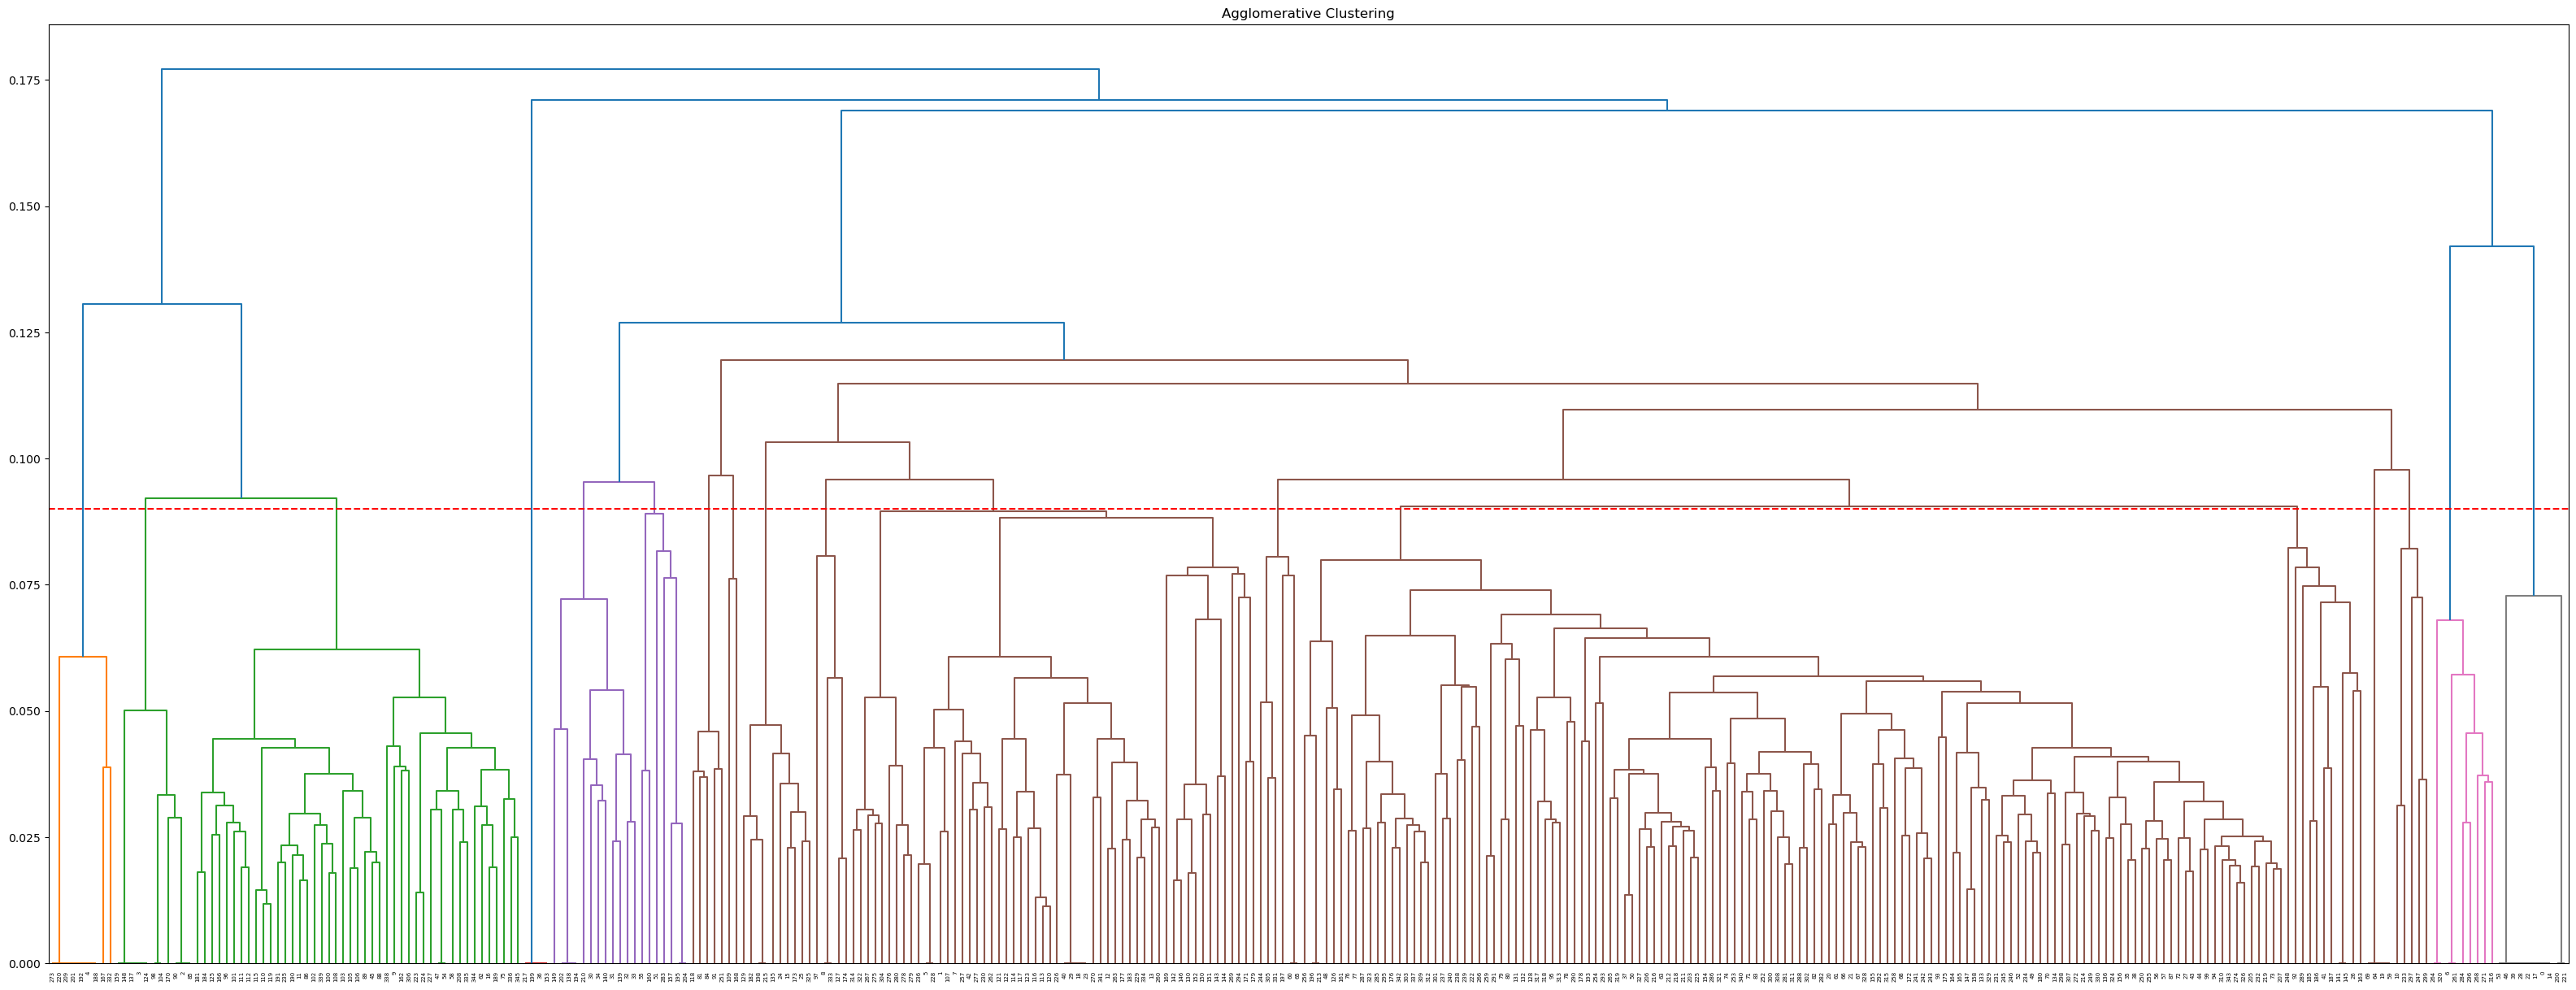

In [12]:
Z = linkage(x, method="ward")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='r')

plt.show()

In [13]:
agg = AgglomerativeClustering(n_clusters=26,linkage="ward")
agg = agg.fit(x)
re=agg.labels_
re

array([ 7, 20, 16, 16, 13, 20,  9, 20, 14,  6, 22,  6, 20, 20,  7, 10,  6,
        7, 20, 11,  0,  0,  7, 20, 10, 10,  1,  0,  7, 20, 15, 15, 15, 15,
       15,  0, 25,  0,  0,  7, 20,  1, 20,  0,  0,  6,  7,  6,  0,  0,  0,
       23,  0,  7,  6, 19,  0,  0,  6, 11,  8,  0,  6,  0, 11,  8,  0,  0,
        0, 11,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0, 12,  0,  0, 12,
       16,  6,  0,  6,  6, 16, 12,  1,  0,  0,  0,  6, 24, 16,  0,  6,  6,
        6,  6, 16,  6,  6, 20,  6,  4,  6,  6,  6, 20, 20,  6, 20, 20, 12,
        6, 20, 20, 20, 20, 16,  6,  0, 14,  0, 10,  3,  0,  0,  0,  0, 10,
        0, 16, 15, 15, 15,  1,  3,  3,  3,  1,  3,  0, 16, 15,  3,  3,  3,
       25,  0,  0,  0,  2,  0, 16, 19,  0,  6,  1,  0,  0,  6, 13,  4,  3,
       16,  3,  0, 10, 14,  0,  0, 20,  0,  3,  0,  6, 10, 20,  6,  1,  1,
        1, 13,  6,  6,  6, 13,  0, 15,  2,  0,  8, 10, 25,  7, 13, 15,  0,
        2,  0,  0,  0,  6, 13, 15,  0,  0,  0,  0, 10,  0, 25,  0,  0, 13,
        7,  0,  6,  6,  0

In [14]:
y['re'] = re

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
y

,Document,re
0,운영체제 서비스 (Operating System Services),7
1,운영체제 사용자 인터페이스 (User Operating System Interface),20
2,시스템 콜 (System Calls),16
3,시스템 콜 유형 (Types of System Calls),16
4,시스템 프로그램 (System Programs),13
...,...,...
341,운영체제를 하드웨어가 시작할 수 있도록 하드웨어에게 알려야 한다,20
342,ROM 또는 EPROM(Erasable Programmable ROM)에 있는 bo...,0
343,두 단계로 나눠지는 경우도 있음- ROM의 특정한 위치에 있는부트블록(boot bl...,0
344,GRUB(GRand Unified Bootloader) : Linux 시스템을 위...,6


In [16]:
y.to_csv("re.csv", mode='w')

In [17]:
y[y['re']==0]

,Document,re
20,명령어 라인 인터페이스 (Command Line Interface)– 문자열 명령 입력,0
21,배치 인터페이스 (Batch Interface)– 명령어 또는 명령어 집합을 파일...,0
27,프로그램 실행에서 요구하는 파일 또는 입출력 장치 등의 입출력 서비스,0
35,파일 접근 권한 관리메시지 전달(Message Passing)공유 메모리(Shar...,0
37,동일한 컴퓨터 또는 네트워크로 연결된 컴퓨터에 있는 프로세스 간정보 교환,0
...,...,...
330,운영체제는 시스템의 행동을계산하고 알려주는 도구를 제공해야한다,0
337,한 개의 일반적인 커널보다 더 효율적인 코드를 생성할 수 있다,0
340,펌웨어(firmware) ROM(Read Only Memory)이 초기 부팅 코드를...,0
342,ROM 또는 EPROM(Erasable Programmable ROM)에 있는 bo...,0


In [18]:
y[y['re']==1]

,Document,re
26,입출력 연산 (I/O),1
41,오류 탐지 (Error Detection),1
92,윈도우의 Win API,1
141,"읽기, 쓰기, 위치 변경 (read, write, reposition)",1
145,"읽기, 쓰기, 위치 변경 (read, write, reposition)",1
163,네트워킹과 인터넷,1
185,상태 코드 : 정상,1
186,상태 코드 아닌 값,1
187,오류 코드,1
289,장점:,1


In [19]:
y[y['re']==2]

,Document,re
157,상태 정보 전달,2
195,상태 정보,2
204,상태 정보 (Status Information),2
283,효율성이 낮다,2


In [20]:
y[y['re']==3]

,Document,re
130,"프로세스 속성(attributes) 획득(get), 프로세스 속성 설정(set)",3
142,파일 속성 획득 및 설정 (get and set file attributes),3
143,장치 관리 (Device management),3
144,"장치 요청, 장치 방출 (request device, release device)",3
146,"장치 속성 획득 및 설정 (get device attributes, set devi...",3
150,"시간과 날짜의 설정과 획득(get time or date, set time or d...",3
151,"시스템 데이터의 설정과 획득(get system data, set system data)",3
152,"프로세스, 파일, 장치 속성의 획득과 설정(get and set process, f...",3
169,C 라이브러리,3
171,단일 태스킹(monoprogramming),3


In [21]:
y[y['re']==10]

,Document,re
15,운영체제는 사용자(또는 프로그램) 들에게 프로그램의 실행 환경을 제공한다,10
24,프로그램 실행 (Execution),10
25,"프로그램을 메모리에 적재, 실행, 실행 종료 (정상 또는 비정상)",10
129,"적재(load), 실행(execute)",10
135,"버그 찾는 debugger, 한 단계씩 실행",10
173,하나의 프로그램을 실행하는간단한 방법 제공,10
182,Exec()을 실행하여 프로그램을 프로세스에적재함,10
198,프로그램 적재와 실행,10
215,프로그램 적재와 실행 (p ~ ),10
325,실행환경이 핵심 라이브러리 집합과 Dalvik 가상 머신 포함Application...,10


In [22]:
y[y['re']==15]

,Document,re
30,파일 시스템,15
31,파일과 디렉토리 생성과 삭제,15
32,파일과 디렉토리 읽고 쓰기,15
33,파일과 디렉토리 찾기,15
34,파일 정보 보기,15
138,파일 관리 (File management),15
139,"파일 생성 (create file), 파일 삭제 (delete file)",15
140,"파일 열기 (open), 파일 닫기 (close file)",15
149,정보 관리(Information maintenance),15
194,파일 관리,15


In [23]:
y[y['re']==20]

,Document,re
1,운영체제 사용자 인터페이스 (User Operating System Interface),20
5,운영체제 설계 및 구현 (Operating System Design and Imp...,20
7,운영체제 디버깅 (Operating System Debugging),20
12,운영체제를 구성하는 다양한 방법에 대해 논의,20
13,"운영체제 설치, 맞춤화 과정(customization), 부팅하는 방법",20
18,사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,20
23,사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,20
29,사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,20
40,사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,20
42,운영체제는 가능한 모든 오류를 인지하고 있어야 함,20


In [24]:
y[y['re']==26]

,Document,re


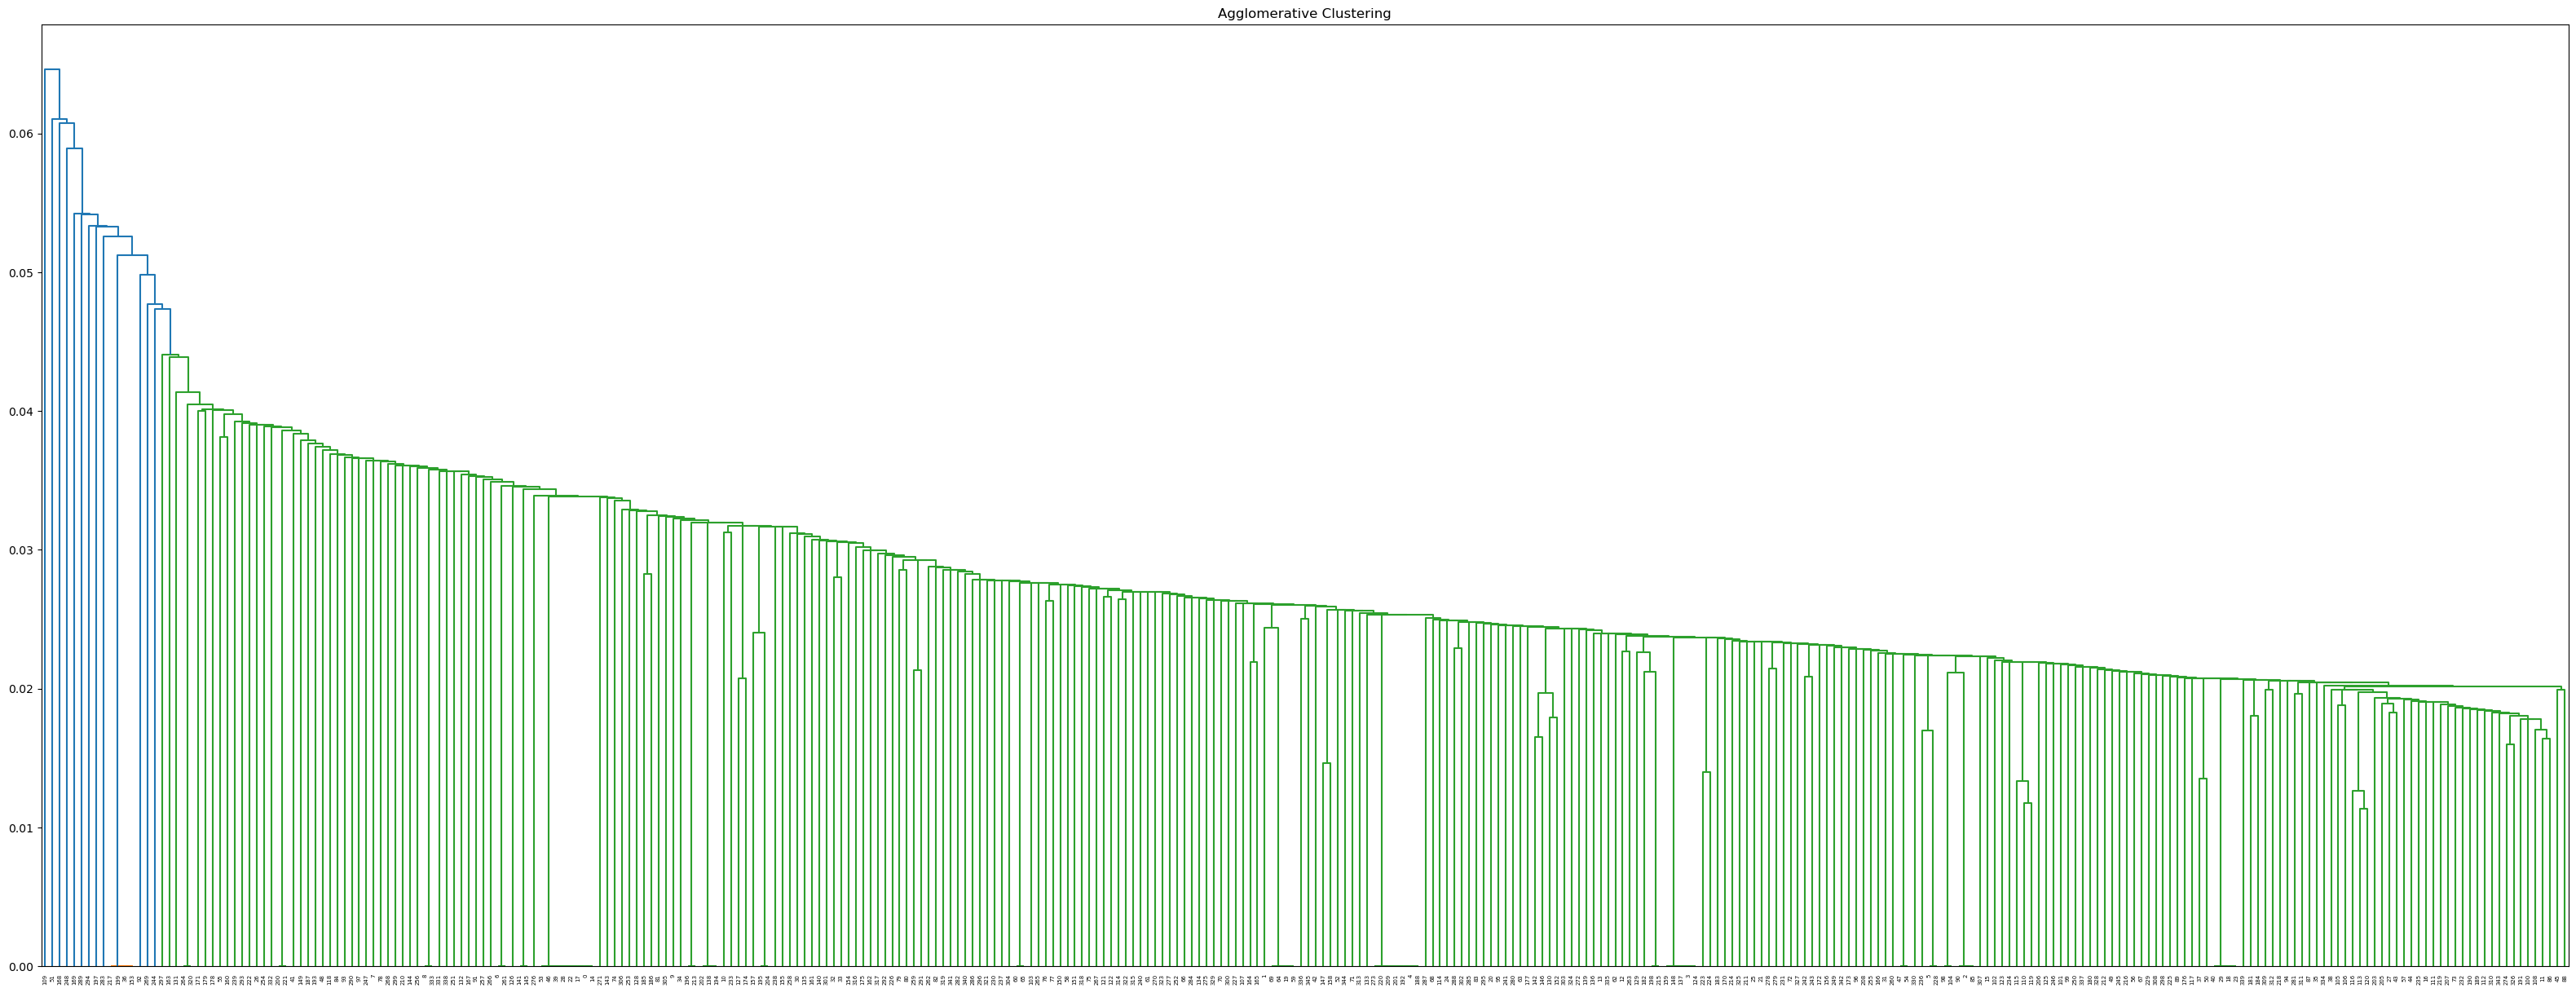

In [25]:
Z = linkage(x, method="single")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

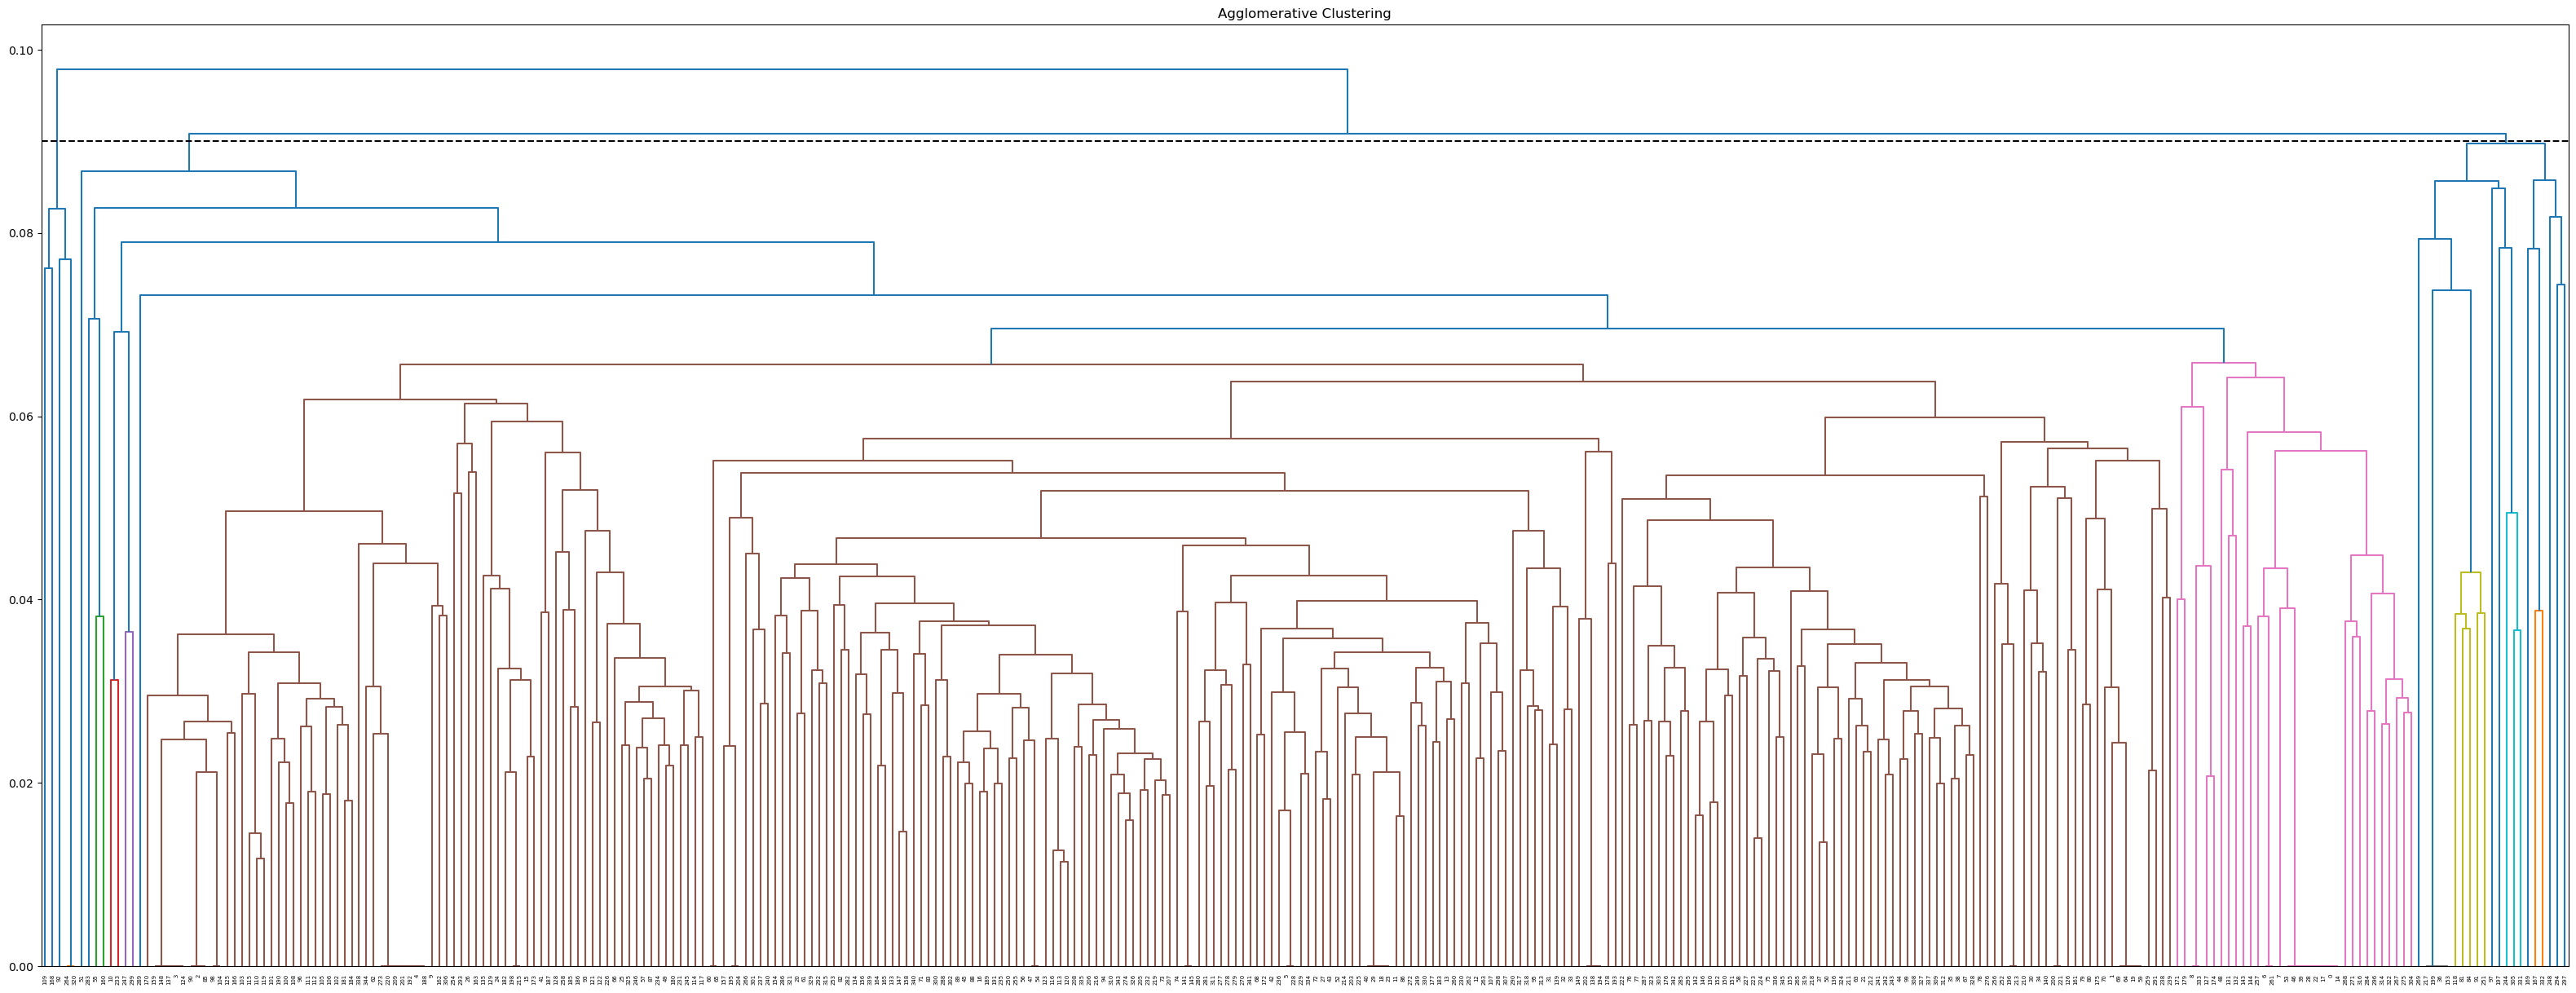

In [26]:
Z = linkage(x, method="complete")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

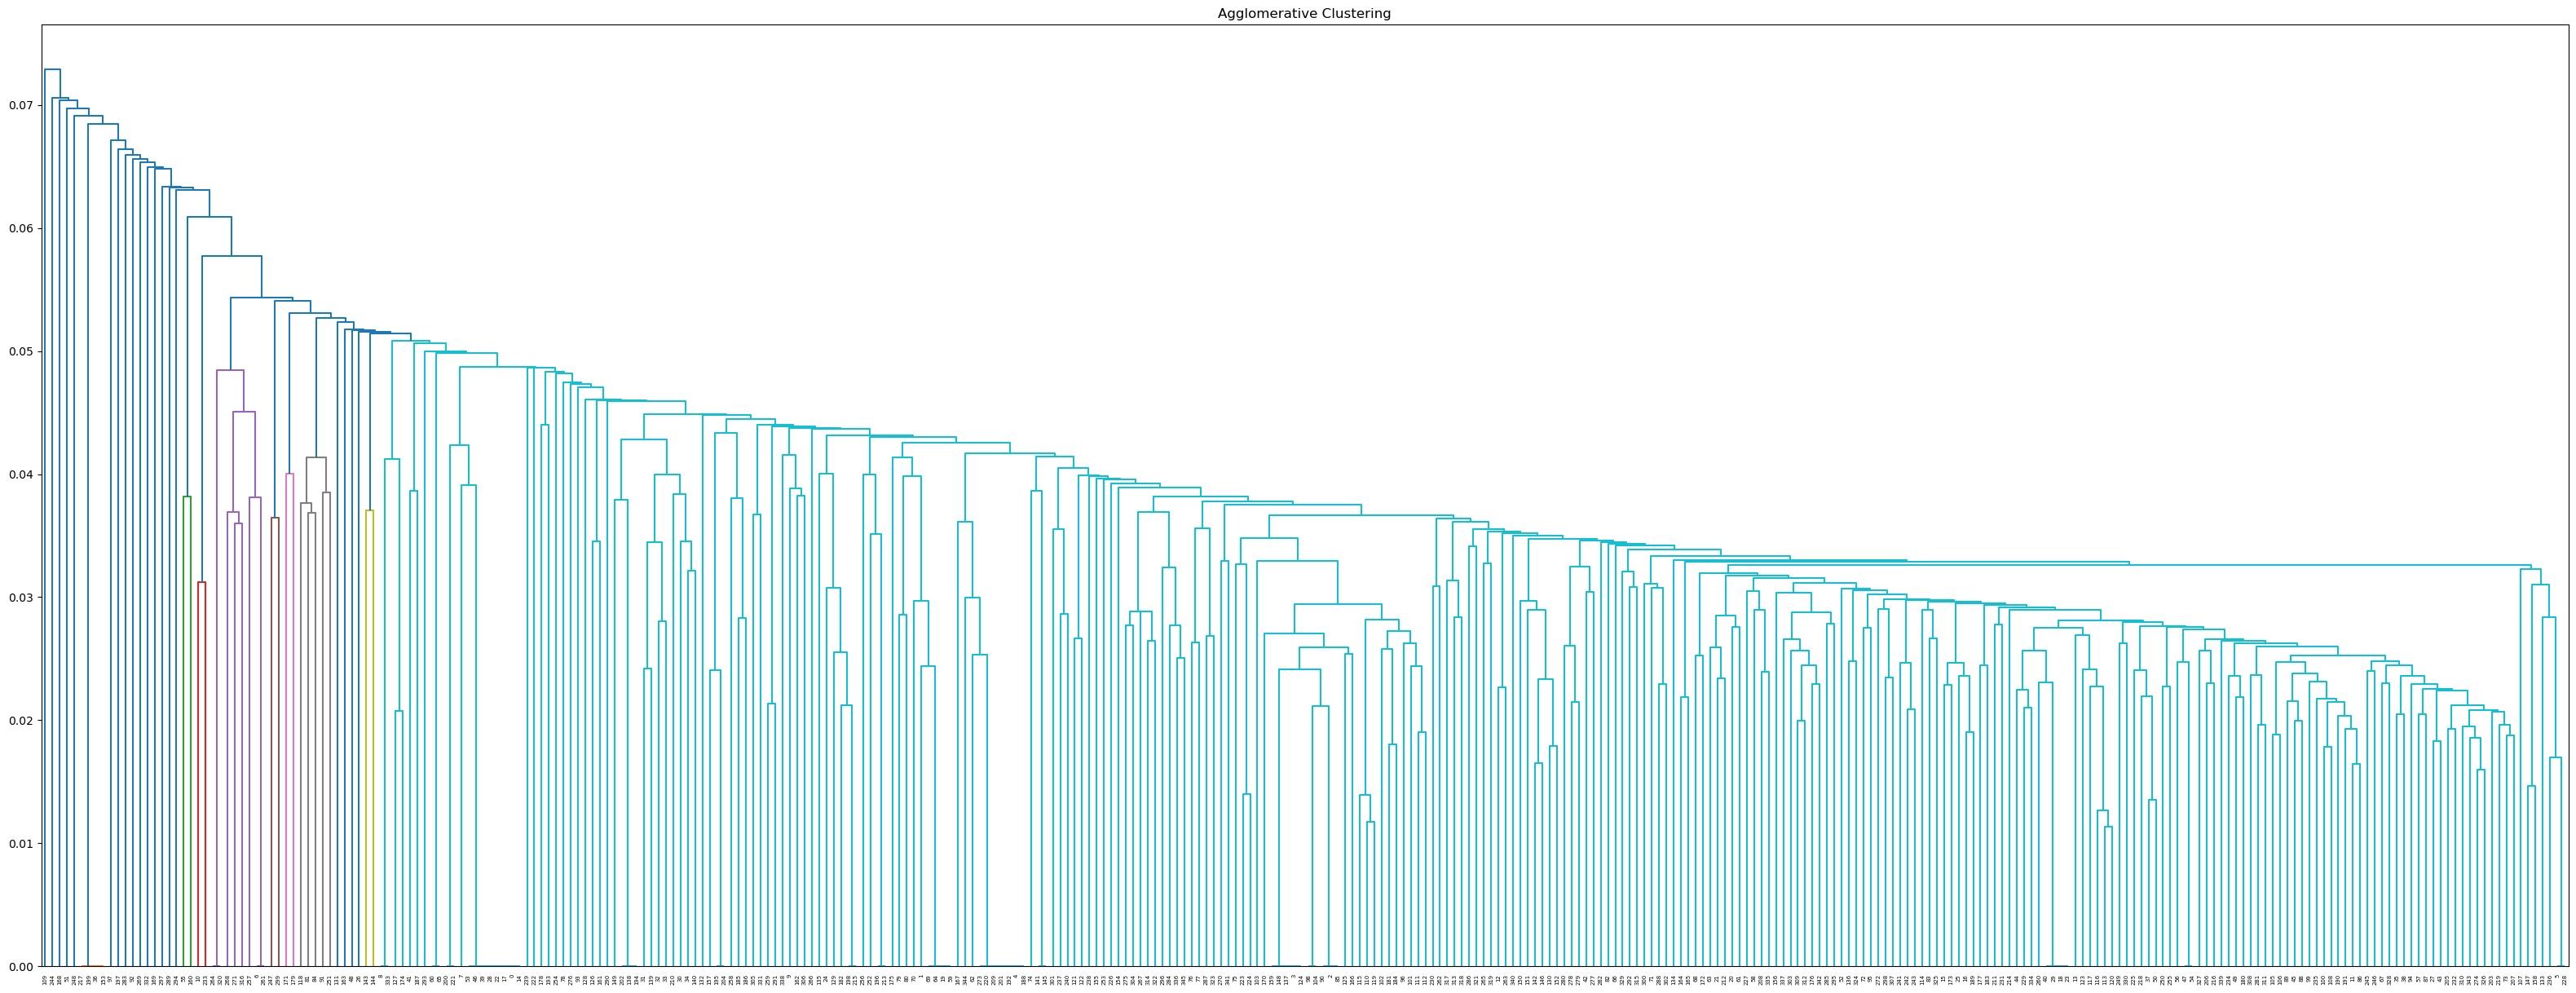

In [27]:
Z = linkage(x, method="average")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

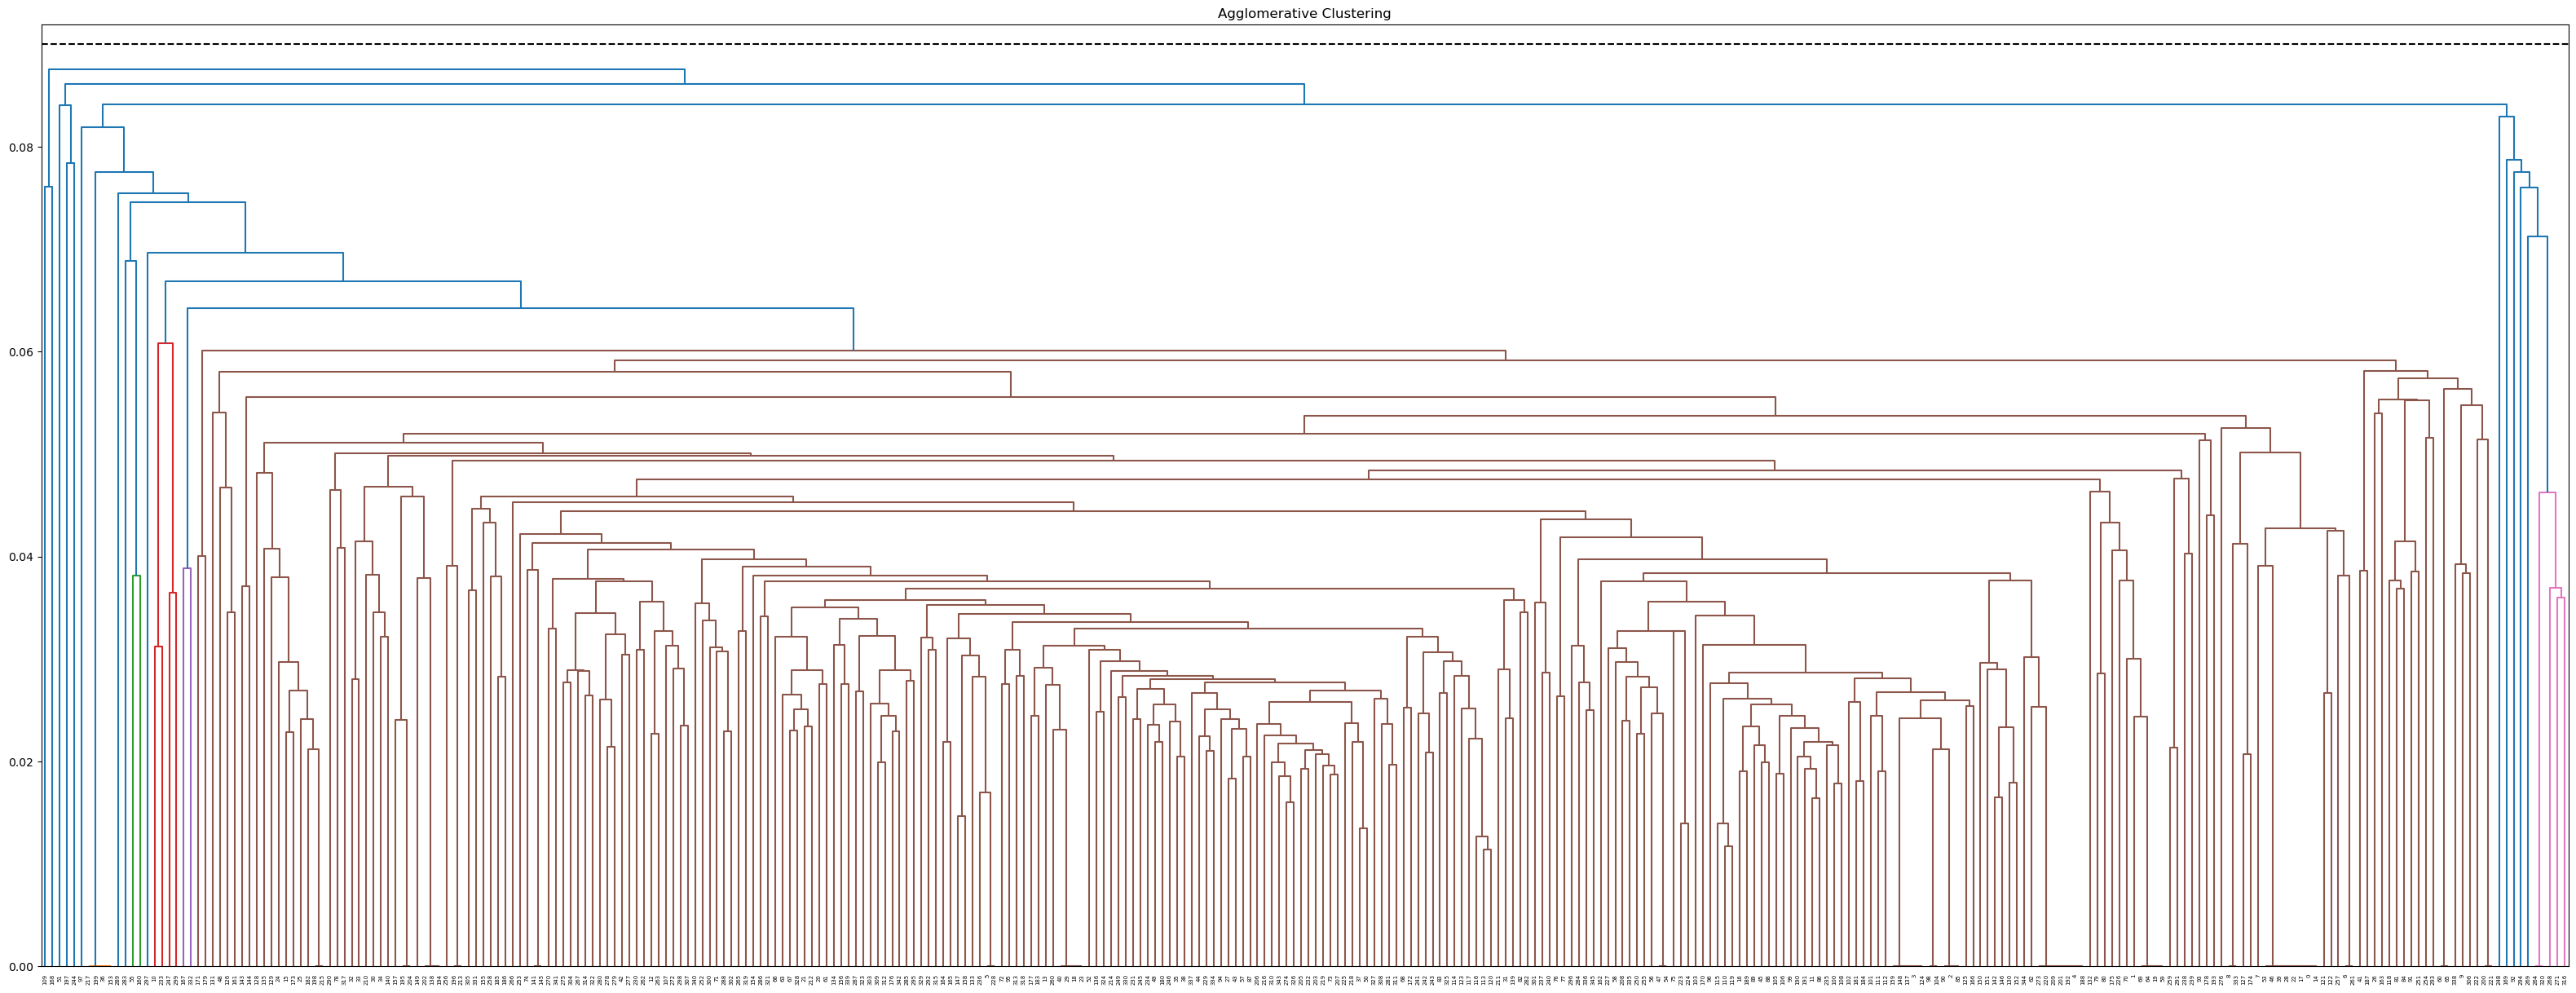

In [28]:
Z = linkage(x, method="weighted")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

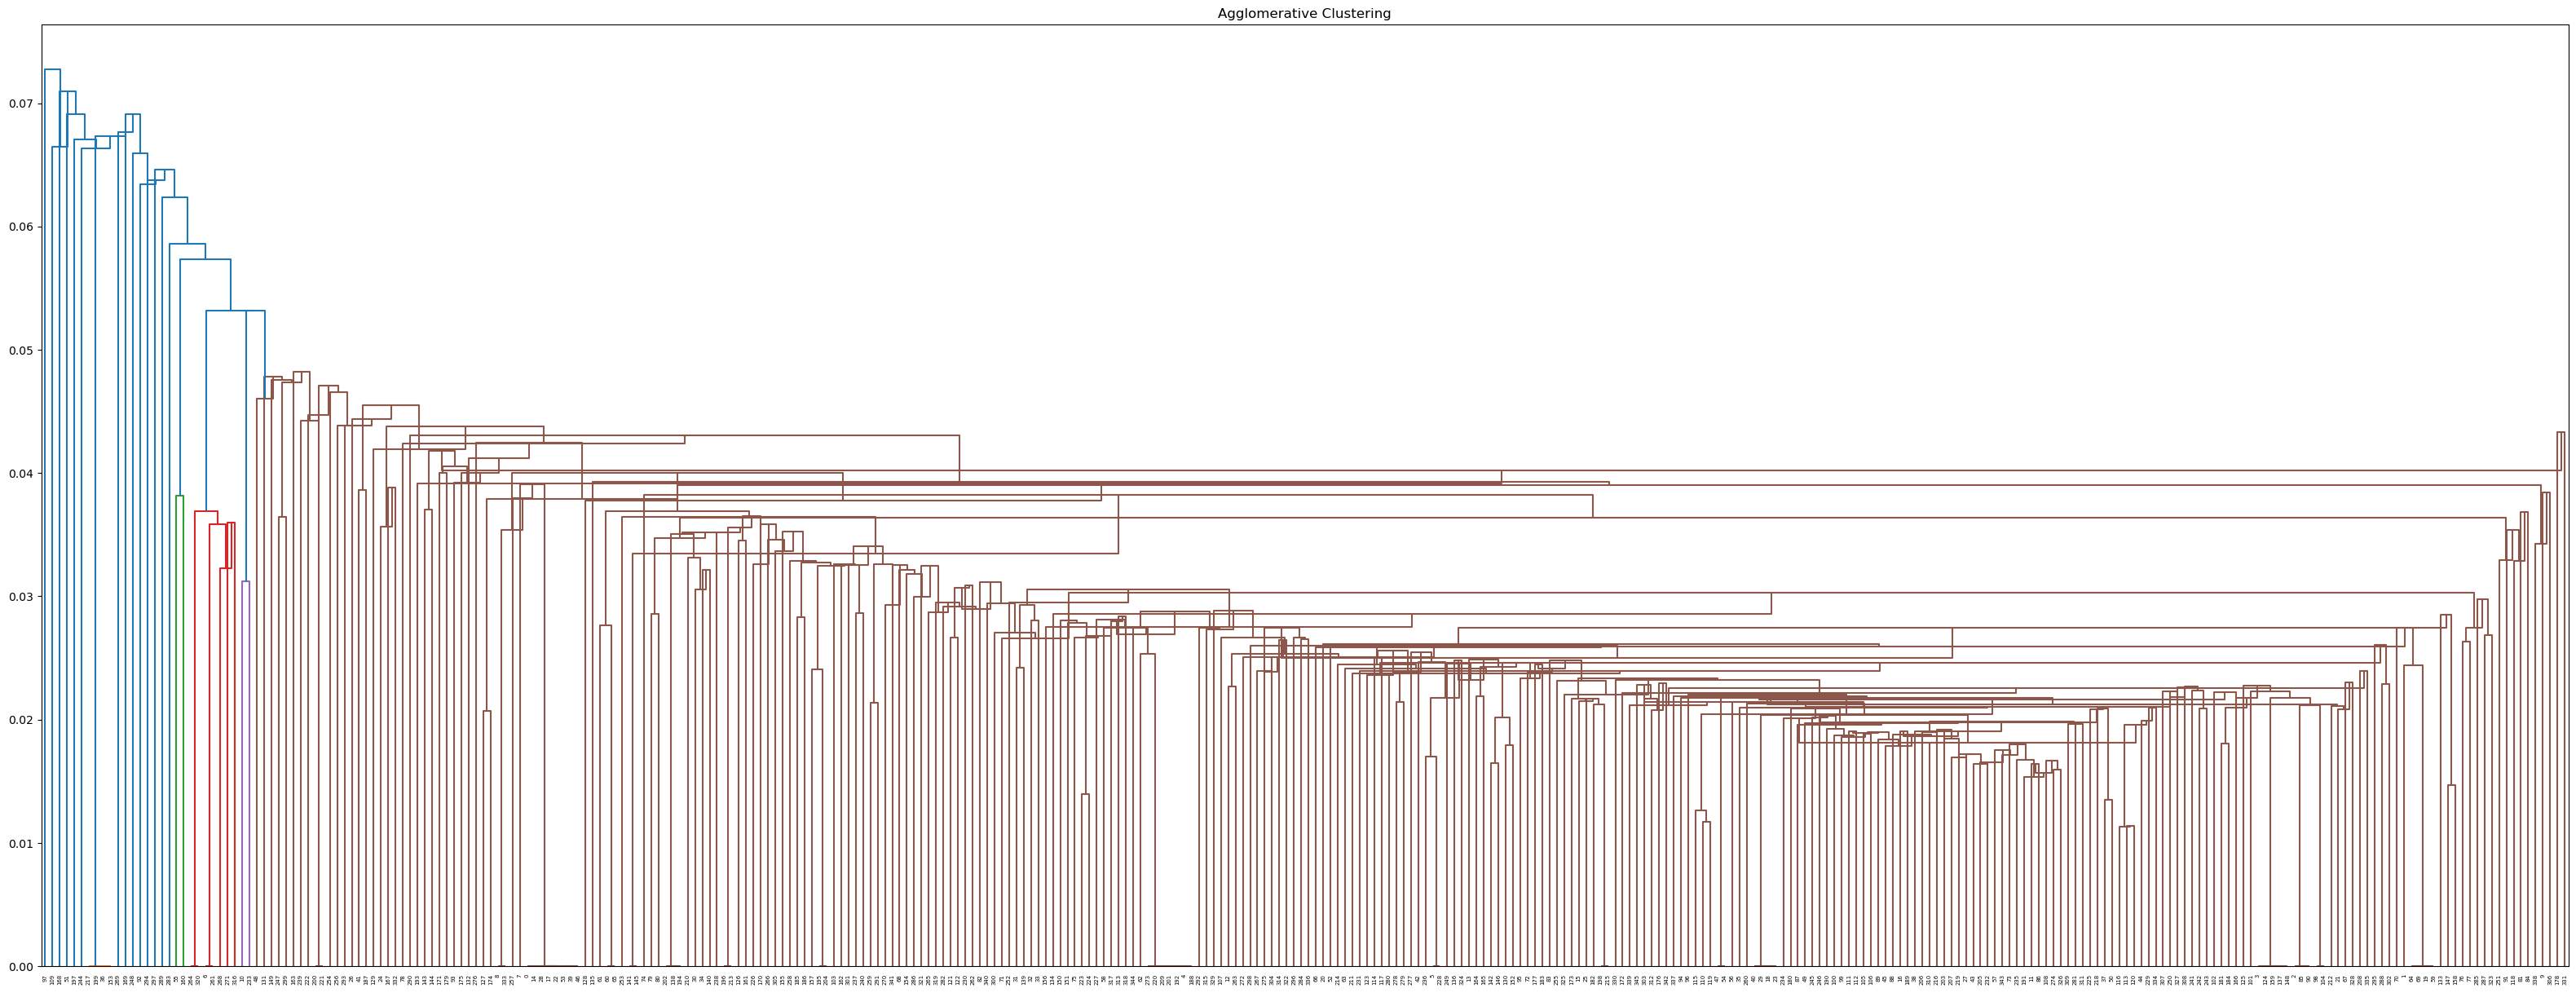

In [29]:
Z = linkage(x, method="median")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()